# Tarefa 1 - Flight Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./datasets/flight_price.csv')

In [3]:
data

,serial_number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data Treatment

In [4]:
data.drop(columns=['serial_number', 'flight'], inplace=True)

In [5]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [7]:
data.isna().any()

airline             False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

In [8]:
data.duplicated().sum()

2213

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [12]:
data.shape

(297940, 10)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297940 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297940 non-null  object 
 1   source_city       297940 non-null  object 
 2   departure_time    297940 non-null  object 
 3   stops             297940 non-null  object 
 4   arrival_time      297940 non-null  object 
 5   destination_city  297940 non-null  object 
 6   class             297940 non-null  object 
 7   duration          297940 non-null  float64
 8   days_left         297940 non-null  int64  
 9   price             297940 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


### Transform the data

### Remove outliers

In [14]:
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1
threshold = 1.5

outliers = (data['price'] < q1 - threshold * iqr) | (data['price'] > q3 + threshold * iqr)

data = data[~outliers]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297817 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297817 non-null  object 
 1   source_city       297817 non-null  object 
 2   departure_time    297817 non-null  object 
 3   stops             297817 non-null  object 
 4   arrival_time      297817 non-null  object 
 5   destination_city  297817 non-null  object 
 6   class             297817 non-null  object 
 7   duration          297817 non-null  float64
 8   days_left         297817 non-null  int64  
 9   price             297817 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 25.0+ MB


#### One-Hot Encoding

In [15]:
from sklearn.preprocessing import LabelBinarizer

data_OHE = data.copy()

features_to_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city']


lb = LabelBinarizer()
for f in features_to_encode:
    data_LB = lb.fit_transform(data[f])
    data_LB_df = pd.DataFrame(data_LB, columns=[f'{f}_{classe}' for classe in lb.classes_])

    data_OHE = pd.concat([data_OHE, data_LB_df], axis=1)
    data_OHE.dropna(inplace=True)
    
data_OHE.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,1


In [16]:
data_OHE.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
297812,Air_India,Chennai,Evening,one,Night,Kolkata,Business,7.58,44.0,54481.0,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0
297813,Air_India,Chennai,Early_Morning,one,Night,Kolkata,Business,17.33,44.0,54481.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,0
297814,Air_India,Chennai,Evening,one,Afternoon,Kolkata,Business,20.08,44.0,54481.0,...,0.0,0.0,0.0,1.0,0,0,0,1,0,0
297815,Air_India,Chennai,Early_Morning,one,Afternoon,Kolkata,Business,29.83,44.0,54481.0,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0
297816,Vistara,Chennai,Morning,one,Evening,Kolkata,Business,7.08,44.0,54896.0,...,1.0,0.0,0.0,0.0,0,0,0,1,0,0


In [17]:
data_OHE.isna().sum()

airline                         0
source_city                     0
departure_time                  0
stops                           0
arrival_time                    0
destination_city                0
class                           0
duration                        0
days_left                       0
price                           0
airline_AirAsia                 0
airline_Air_India               0
airline_GO_FIRST                0
airline_Indigo                  0
airline_SpiceJet                0
airline_Vistara                 0
source_city_Bangalore           0
source_city_Chennai             0
source_city_Delhi               0
source_city_Hyderabad           0
source_city_Kolkata             0
source_city_Mumbai              0
departure_time_Afternoon        0
departure_time_Early_Morning    0
departure_time_Evening          0
departure_time_Late_Night       0
departure_time_Morning          0
departure_time_Night            0
stops_one                       0
stops_two_or_m

In [18]:
data_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295481 entries, 0 to 297816
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   airline                       295481 non-null  object 
 1   source_city                   295481 non-null  object 
 2   departure_time                295481 non-null  object 
 3   stops                         295481 non-null  object 
 4   arrival_time                  295481 non-null  object 
 5   destination_city              295481 non-null  object 
 6   class                         295481 non-null  object 
 7   duration                      295481 non-null  float64
 8   days_left                     295481 non-null  float64
 9   price                         295481 non-null  float64
 10  airline_AirAsia               295481 non-null  float64
 11  airline_Air_India             295481 non-null  float64
 12  airline_GO_FIRST              295481 non-null  fl

In [19]:
data_OHE.drop(columns=features_to_encode, inplace=True)

### Lable Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
data_OHE['class'] = lb.fit_transform(data_OHE['class']) + 1

In [21]:
data_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295481 entries, 0 to 297816
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   class                         295481 non-null  int32  
 1   duration                      295481 non-null  float64
 2   days_left                     295481 non-null  float64
 3   price                         295481 non-null  float64
 4   airline_AirAsia               295481 non-null  float64
 5   airline_Air_India             295481 non-null  float64
 6   airline_GO_FIRST              295481 non-null  float64
 7   airline_Indigo                295481 non-null  float64
 8   airline_SpiceJet              295481 non-null  float64
 9   airline_Vistara               295481 non-null  float64
 10  source_city_Bangalore         295481 non-null  float64
 11  source_city_Chennai           295481 non-null  float64
 12  source_city_Delhi             295481 non-null  fl

In [22]:
float_features = data_OHE.select_dtypes(include='float')

data_OHE[float_features.columns] = data_OHE[float_features.columns].astype(np.float32)
data_OHE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295481 entries, 0 to 297816
Data columns (total 37 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   class                         295481 non-null  int32  
 1   duration                      295481 non-null  float32
 2   days_left                     295481 non-null  float32
 3   price                         295481 non-null  float32
 4   airline_AirAsia               295481 non-null  float32
 5   airline_Air_India             295481 non-null  float32
 6   airline_GO_FIRST              295481 non-null  float32
 7   airline_Indigo                295481 non-null  float32
 8   airline_SpiceJet              295481 non-null  float32
 9   airline_Vistara               295481 non-null  float32
 10  source_city_Bangalore         295481 non-null  float32
 11  source_city_Chennai           295481 non-null  float32
 12  source_city_Delhi             295481 non-null  fl

### Label Encoding

In [23]:
data_LAB = data.copy()

lb = LabelEncoder() 
features_to_encode = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

for f in features_to_encode:
    data_LAB[f] = lb.fit_transform(data_LAB[f]) + 1

data_LAB.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,5,3,3,3,6,6,2,2.17,1,5953
1,5,3,2,3,5,6,2,2.33,1,5953
2,1,3,2,3,2,6,2,2.17,1,5956
3,6,3,5,3,1,6,2,2.25,1,5955
4,6,3,5,3,5,6,2,2.33,1,5955


In [24]:
data_LAB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297817 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297817 non-null  int32  
 1   source_city       297817 non-null  int32  
 2   departure_time    297817 non-null  int32  
 3   stops             297817 non-null  int32  
 4   arrival_time      297817 non-null  int32  
 5   destination_city  297817 non-null  int32  
 6   class             297817 non-null  int32  
 7   duration          297817 non-null  float64
 8   days_left         297817 non-null  int64  
 9   price             297817 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 25.1 MB


In [25]:
data_LAB['duration'] = data_LAB['duration'].astype(np.float32)
data_LAB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297817 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           297817 non-null  int32  
 1   source_city       297817 non-null  int32  
 2   departure_time    297817 non-null  int32  
 3   stops             297817 non-null  int32  
 4   arrival_time      297817 non-null  int32  
 5   destination_city  297817 non-null  int32  
 6   class             297817 non-null  int32  
 7   duration          297817 non-null  float32
 8   days_left         297817 non-null  int64  
 9   price             297817 non-null  int64  
dtypes: float32(1), int32(7), int64(2)
memory usage: 24.0 MB


### Test Train Split

#### One-Hot Encoded Data

In [26]:
X_OHE = data_OHE.drop('price', axis=1)
y_OHE = data_OHE[['price']]

#### Factorized Data

In [27]:
X_LAB = data_LAB.drop('price', axis=1)
y_LAB = data_LAB[['price']]

#### Normalize

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

encoding = 0 # 0 -> One-Hot Encoding | 1 -> Factorize

if encoding == 0: # One-Hot Encoding
    scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_OHE)
    scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y_OHE)
    X_scaled = pd.DataFrame(scaler_X.transform(X_OHE[X_OHE.columns]), columns=X_OHE.columns)
    y_scaled = pd.DataFrame(scaler_y.transform(y_OHE[y_OHE.columns]), columns=y_OHE.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=2023, shuffle=True)
    y_test = scaler_y.inverse_transform(y_test)

elif encoding == 1: # Factorize
    scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_LAB)
    scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y_LAB)
    X_scaled = pd.DataFrame(scaler_X.transform(X_LAB[X_LAB.columns]), columns=X_LAB.columns)
    y_scaled = pd.DataFrame(scaler_y.transform(y_LAB[y_LAB.columns]), columns=y_LAB.columns)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=2023, shuffle=True)
    y_test = scaler_y.inverse_transform(y_test)

else: # Not Normalized
    X_train, X_test, y_train, y_test = train_test_split(X_LAB, y_LAB, test_size=0.25, random_state=2023, shuffle=True)

### Denormalize

In [29]:
def denormalize(prediction, encoding=1):
    if encoding == 0:
        prediction = prediction.reshape(prediction.shape[0], 1)
        prediction = scaler_y.inverse_transform(prediction)

    elif encoding == 1:
        prediction = prediction.reshape(prediction.shape[0], 1)
        prediction = scaler_y.inverse_transform(prediction)
    
    return prediction

In [30]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Aux Functions

In [31]:
def printMetrics(prediction):
    print('Mean Absolute Error: ',end='')
    print(mean_absolute_error(y_test, prediction))
    
    print('\nMean Squared Error: ', end='')
    print(mean_squared_error(y_test, prediction, squared=True))
    
    print('\nRoot Mean Squared Error: ', end='')
    print(mean_squared_error(y_test, prediction, squared=False))


def plotPrediction(prediction):
    plt.scatter(y_test, prediction)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Comparison of Predicted vs Actual values')

## Modeling

### Linear Regressor

In [88]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
predictionLR = lr.predict(X_test)

predictionLR = denormalize(predictionLR)

In [89]:
printMetrics(predictionLR)

Mean Absolute Error: 4633.389280118624

Mean Squared Error: 48298949.709106185

Root Mean Squared Error: 6949.744578695406


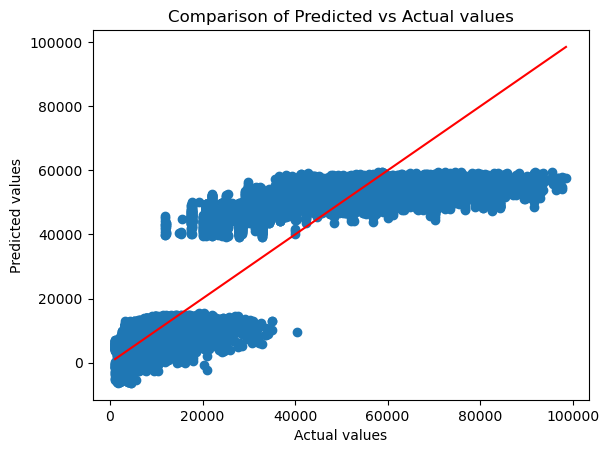

In [90]:
plotPrediction(predictionLR)

#### Cross Validation

In [447]:
scores = cross_val_score(lr, X_LAB, y_LAB, cv=10)
print(scores)
print("Result: %0.2f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

[-0.08020894 -0.02664671 -0.15272346  0.04539465 -0.06907159 -0.10925289
  0.81711778  0.20660974  0.11995594  0.164315  ]
Result: 0.09 accuracy with standard deviation of 0.27


### Decision Tree Regressor

#### Hold-out Validation

In [82]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=2023)

dtr.fit(X_train, y_train)
predictionDTR = dtr.predict(X_test)

predictionDTR = denormalize(predictionDTR, encoding)

In [83]:
printMetrics(predictionDTR)

Mean Absolute Error: 1170.218825688898

Mean Squared Error: 11781314.311008887

Root Mean Squared Error: 3432.391922698934


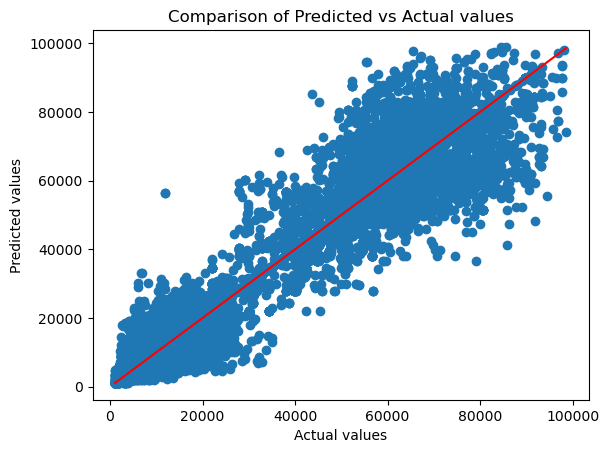

In [84]:
plotPrediction(predictionDTR)

#### Cross Validation

In [35]:
scores = cross_val_score(dtr, X_LAB, y_LAB, cv=10)
print(scores)
print("Result: %0.2f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.25912781 0.34628069 0.26321537 0.37449266 0.21727594 0.3116711
 0.87438271 0.17716378 0.0870544  0.03928674]
Result: 0.29 accuracy with standard deviation of 0.22


#### GridSearch

In [85]:
param_grid = {
    'criterion': ['friedman_mse'],
    'max_depth': [30],
    'min_samples_split': [5],  
    'min_samples_leaf': [7],
}

grid_searchDTR = GridSearchCV(dtr, param_grid, cv=5, refit=True, verbose=3, scoring='neg_mean_squared_error')
grid_searchDTR.fit(X_train, y_train)
grid_predictionDTR = grid_searchDTR.predict(X_test)


print("Best estimator: ", grid_searchDTR.best_estimator_)


grid_predictionDTR = denormalize(grid_predictionDTR, encoding)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=7, min_samples_split=5;, score=-0.001 total time=   0.3s
[CV 2/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=7, min_samples_split=5;, score=-0.001 total time=   0.3s
[CV 3/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=7, min_samples_split=5;, score=-0.001 total time=   0.3s
[CV 4/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=7, min_samples_split=5;, score=-0.001 total time=   0.3s
[CV 5/5] END criterion=friedman_mse, max_depth=30, min_samples_leaf=7, min_samples_split=5;, score=-0.001 total time=   0.3s
Best estimator:  DecisionTreeRegressor(criterion='friedman_mse', max_depth=30,
                      min_samples_leaf=7, min_samples_split=5,
                      random_state=2023)


In [86]:
printMetrics(grid_predictionDTR)

Mean Absolute Error: 1264.4834401771575

Mean Squared Error: 8484109.773547484

Root Mean Squared Error: 2912.7495212509234


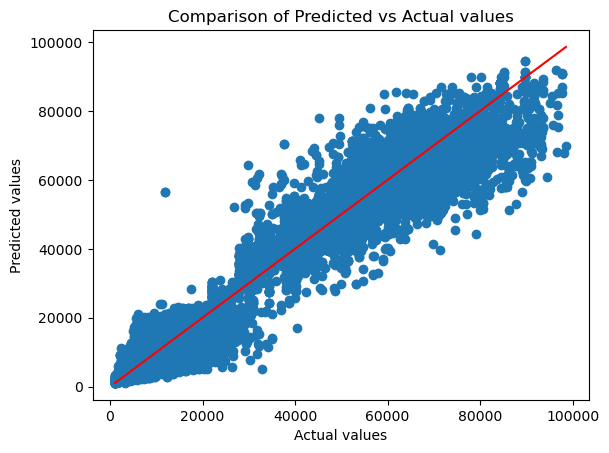

In [87]:
plotPrediction(grid_predictionDTR)

### Random Forest

#### Hold-out Validation

In [38]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
predictionRFR = rfr.predict(X_test)

predictionRFR = denormalize(predictionRFR, encoding)

printMetrics(predictionRFR)

Mean Absolute Error: 1099.9970486222705

Mean Squared Error: 7550163.609341767

Root Mean Squared Error: 2747.7561044135205


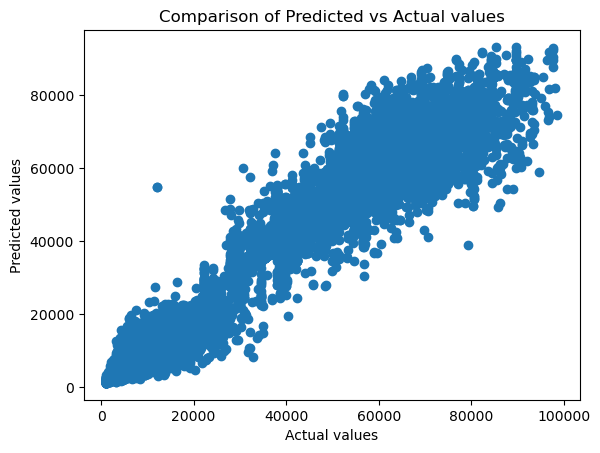

In [39]:
plotPrediction(predictionRFR)

#### Cross Validation

In [457]:
scores = cross_val_score(rfr, X_LAB, y_LAB, cv=10)
print(scores)
print("Result: %0.2f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.54135748 0.56785644 0.5252252  0.57832177 0.52364187 0.56507077
 0.92896403 0.33254782 0.32359456 0.22564806]
Result: 0.51 accuracy with standard deviation of 0.18


#### GridSearch

In [45]:
param_grid = {
    'n_estimators': [725],
    'max_depth': [35],
    'min_samples_split': [5],
    'min_samples_leaf': [7]
}

grid_searchRFR = GridSearchCV(rfr, param_grid, cv=2, refit=True, verbose=3, scoring='neg_mean_squared_error')
grid_searchRFR.fit(X_train, y_train)
grid_predictionRFR = grid_searchRFR.predict(X_test)

grid_predictionRFR = denormalize(grid_predictionRFR, encoding)

print("Best estimator: ", grid_searchRFR.best_estimator_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2] END max_depth=35, min_samples_leaf=7, min_samples_split=5, n_estimators=725;, score=-0.001 total time= 2.0min
[CV 2/2] END max_depth=35, min_samples_leaf=7, min_samples_split=5, n_estimators=725;, score=-0.001 total time= 2.1min
Best estimator:  RandomForestRegressor(max_depth=35, min_samples_leaf=7, min_samples_split=5,
                      n_estimators=725, random_state=2023)


In [46]:
printMetrics(grid_predictionRFR)

Mean Absolute Error: 1255.3166033767284

Mean Squared Error: 7420787.738539684

Root Mean Squared Error: 2724.112284495572


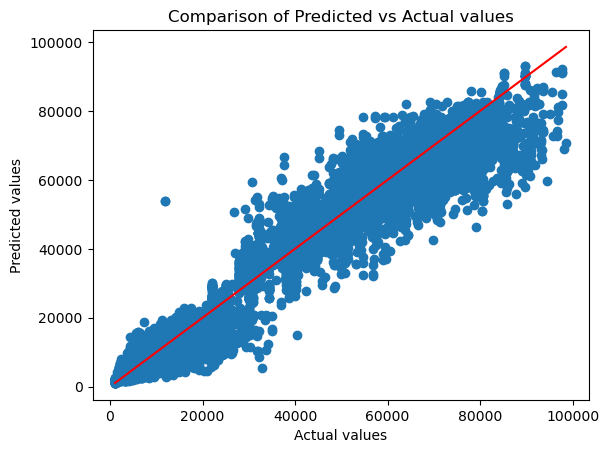

In [81]:
plotPrediction(grid_predictionRFR)

### Multilayer Perceptron

#### Build Model

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense#, Dropout, BatchNormalization
from scikeras.wrappers import KerasRegressor#, KerasClassifier

In [69]:
X_train.shape[1]

36

In [70]:
def build_model(activation = 'sigmoid', learning_rate = 0.01, input_dim=36): # To get input_dim: X.shape[1]
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation=activation))
    model.add(Dense(8, activation=activation))
    # model.add(Dense(16, activation=activation))
    # model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation=activation)) #output

    # Compile the model

    model.compile(
        loss = 'mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae', 'mse']
    )
    return model

In [71]:
model = build_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 16)                592       
                                                                 
 dense_49 (Dense)            (None, 8)                 136       
                                                                 
 dense_50 (Dense)            (None, 1)                 9         
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [72]:
from sklearn.model_selection import KFold

optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

kf = KFold(n_splits=3, shuffle=True, random_state=2023)

model = KerasRegressor(model = build_model, batch_size=128, epochs=10)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'neg_mean_absolute_error', verbose=1, refit=True)

In [73]:
grid_search.fit(X_train, y_train, validation_split = 0.2)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/10


924/924 [==============================] - 1s 732us/step - loss: 0.0747 - mae: 0.0747 - mse: 0.0203 - val_loss: 0.0437 - val_mae: 0.0437 - val_mse: 0.0055
Epoch 2/10
924/924 [==============================] - 1s 653us/step - loss: 0.0424 - mae: 0.0424 - mse: 0.0052 - val_loss: 0.0401 - val_mae: 0.0401 - val_mse: 0.0045
Epoch 3/10
924/924 [==============================] - 1s 655us/step - loss: 0.0373 - mae: 0.0373 - mse: 0.0039 - val_loss: 0.0363 - val_mae: 0.0363 - val_mse: 0.0036
Epoch 4/10
924/924 [==============================] - 1s 655us/step - loss: 0.0352 - mae: 0.0352 - mse: 0.0035 - val_loss: 0.0348 - val_mae: 0.0348 - val_mse: 0.0035
Epoch 5/10
924/924 [==============================] - 1s 646us/step - loss: 0.0346 - mae: 0.0346 - mse: 0.0034 - val_loss: 0.0349 - val_mae: 0.0349 - val_mse: 0.0035
Epoch 6/10
924/924 [==============================] - 1s 639us/step - loss: 0.0342 - mae: 0.0342 - mse: 0.0033 - val_loss: 0.0349 - val_mae: 0.0349 - val_mse: 0.0035
Epoch 7/10
924/

GridSearchCV(cv=KFold(n_splits=3, random_state=2023, shuffle=True),
             estimator=KerasRegressor(batch_size=128, epochs=10, model=<function build_model at 0x00000159283C5A20>),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
print('Best: %f using %s' % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

Best: -0.033529 using {'optimizer': 'SGD'}
-0.033529 (0.000161) with: {'optimizer': 'SGD'}
-0.033623 (0.000084) with: {'optimizer': 'RMSprop'}
-0.033803 (0.000496) with: {'optimizer': 'Adagrad'}


In [75]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasRegressor(
	model=<function build_model at 0x00000159283C5A20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
)


In [76]:
y_test = scaler_y.transform(y_test)
best_mlp_model.fit(X_train, y_train, epochs = 50, validation_data = (X_test, y_test),verbose = 1)

Epoch 1/50
1732/1732 [==============================] - 2s 817us/step - loss: 0.0565 - mae: 0.0565 - mse: 0.0113 - val_loss: 0.0428 - val_mae: 0.0428 - val_mse: 0.0053
Epoch 2/50
1732/1732 [==============================] - 1s 770us/step - loss: 0.0419 - mae: 0.0419 - mse: 0.0052 - val_loss: 0.0403 - val_mae: 0.0403 - val_mse: 0.0048
Epoch 3/50
1732/1732 [==============================] - 1s 774us/step - loss: 0.0374 - mae: 0.0374 - mse: 0.0040 - val_loss: 0.0355 - val_mae: 0.0355 - val_mse: 0.0035
Epoch 4/50
1732/1732 [==============================] - 1s 763us/step - loss: 0.0348 - mae: 0.0348 - mse: 0.0034 - val_loss: 0.0343 - val_mae: 0.0343 - val_mse: 0.0034
Epoch 5/50
1732/1732 [==============================] - 1s 766us/step - loss: 0.0342 - mae: 0.0342 - mse: 0.0034 - val_loss: 0.0346 - val_mae: 0.0346 - val_mse: 0.0033
Epoch 6/50
1732/1732 [==============================] - 1s 774us/step - loss: 0.0339 - mae: 0.0339 - mse: 0.0033 - val_loss: 0.0337 - val_mae: 0.0337 - val_mse:

KerasRegressor(
	model=<function build_model at 0x00000159283C5A20>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=SGD
	loss=None
	metrics=None
	batch_size=128
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
)

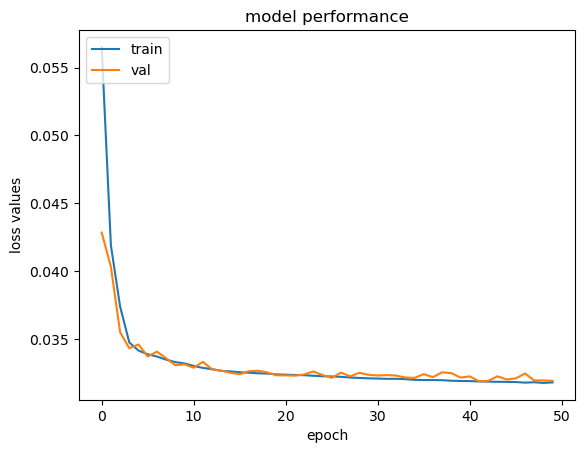

In [77]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss']) 
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
predictionMLP = best_mlp_model.predict(X_test)

578/578 [==============================] - 0s 431us/step


In [79]:
predictionMLP = scaler_y.inverse_transform(predictionMLP)
y_test = scaler_y.inverse_transform(y_test)

In [80]:
printMetrics(predictionMLP)

Mean Absolute Error: 3124.3315

Mean Squared Error: 29976532.0

Root Mean Squared Error: 5475.083


In [81]:
predictionMLP

array([[ 5227.273 ],
       [55073.688 ],
       [53580.707 ],
       ...,
       [ 5226.573 ],
       [59118.56  ],
       [ 4618.1465]], dtype=float32)

In [82]:
y_test

array([[ 5949.   ],
       [55982.   ],
       [50956.996],
       ...,
       [ 4205.   ],
       [58212.   ],
       [ 5027.   ]], dtype=float32)

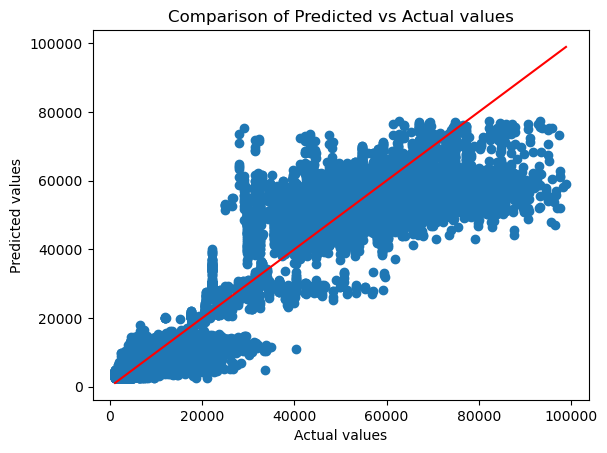

In [83]:
plotPrediction(predictionMLP)

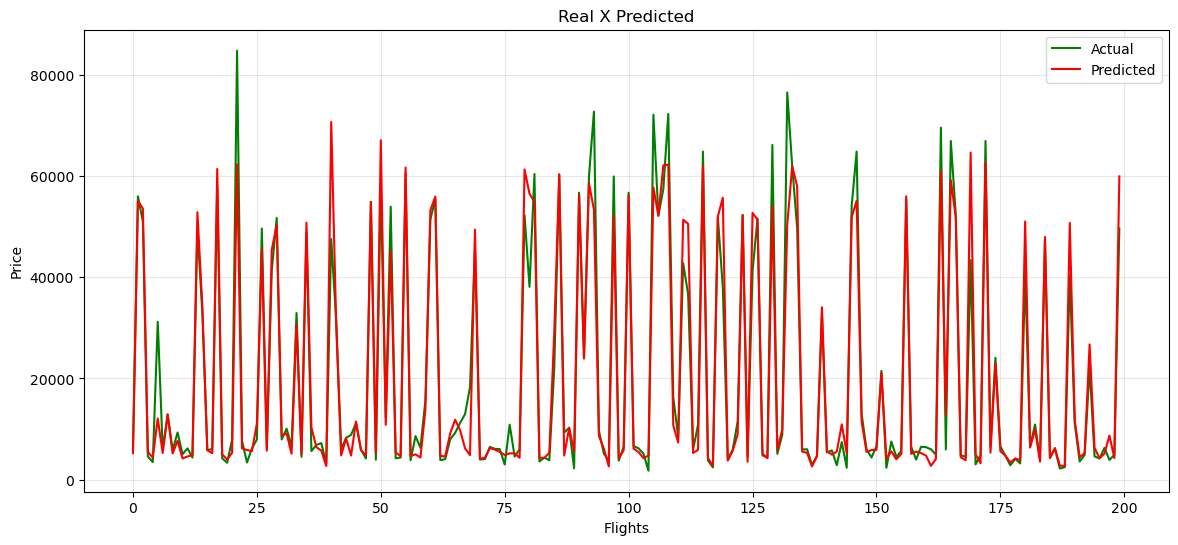

In [88]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit], color='green',label="Actual")
    plt.plot(predictionMLP[:limit],color="red",label="Predicted")
    plt.grid(alpha=0.3)
    plt.xlabel('Flights')
    plt.ylabel('Price')
    plt.title('Real X Predicted')
    plt.legend()
    plt.show()

real_predicted_viz(200)  

In [85]:
# scores = cross_val_score(model, X_OHE, y_OHE, cv=kf)
# print(scores)
# print("Result: %0.2f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))